# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlb

In [2]:
train = pd.read_csv('./ilp2021f/train_final.csv')
test = pd.read_csv('./ilp2021f/test_final.csv')

In [3]:
train_y = train[["income>50K"]]
train_X = train[['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']]
test_X = test[['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']]

In [4]:
train_X = train_X.replace('?',np.NaN)
test_X = test_X.replace('?',np.NaN)

train_X = train_X.fillna(train.mode().iloc[0])
test_X = test_X.fillna(test.mode().iloc[0])

In [5]:
train_X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,Private,83451,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States
24996,64,Local-gov,202738,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States
24997,39,Private,225544,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Poland
24998,53,Private,346871,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Male,4787,0,46,United-States


In [6]:
label_workclass = train_X['workclass'].unique()
label_education = train_X['education'].unique()
label_maritalstatus = train_X['marital.status'].unique()
label_relationship = train_X['relationship'].unique()
label_race = train_X['race'].unique()
label_sex = train_X['sex'].unique()

labeling model for Occupation and Native Country will be constructed by sum of test and train

In [7]:
label_occupation = np.unique(np.append(test_X['occupation'].unique(),test_X['occupation'].unique()))
label_native = np.unique((test_X['native.country'].unique(),test_X['native.country'].unique()))

In [8]:
label_occupation

array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty',
       'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
      dtype=object)

In [9]:
from sklearn import preprocessing

In [10]:
workclass = preprocessing.LabelEncoder()
native = preprocessing.LabelEncoder()
education = preprocessing.LabelEncoder()
occupation = preprocessing.LabelEncoder()
marital = preprocessing.LabelEncoder()
relation = preprocessing.LabelEncoder()
race = preprocessing.LabelEncoder()
sex = preprocessing.LabelEncoder()

In [11]:
workclass

LabelEncoder()

In [12]:
native.fit(label_native)
occupation.fit(label_occupation)
education.fit(label_education)
marital.fit(label_maritalstatus)
relation.fit(label_relationship)
race.fit(label_race)
workclass.fit(label_workclass)
sex.fit(label_sex)

LabelEncoder()

In [13]:
train_X['occupation']

0          Prof-specialty
1         Exec-managerial
2            Craft-repair
3            Craft-repair
4        Transport-moving
               ...       
24995        Adm-clerical
24996        Adm-clerical
24997    Transport-moving
24998      Prof-specialty
24999      Prof-specialty
Name: occupation, Length: 25000, dtype: object

In [14]:
train_occ = occupation.transform(train_X['occupation'])
train_marital = marital.transform(train_X['marital.status'])
train_relation = relation.transform(train_X['relationship'])
train_race = race.transform(train_X['race'])
train_sex = sex.transform(train_X['sex'])
train_work = workclass.transform(train_X['workclass'])
train_native = native.transform(train_X['native.country'])
train_education = education.transform(train_X['education'])

test_occ = occupation.transform(test_X['occupation'])
test_marital = marital.transform(test_X['marital.status'])
test_relation = relation.transform(test_X['relationship'])
test_race = race.transform(test_X['race'])
test_sex = sex.transform(test_X['sex'])
test_work = workclass.transform(test_X['workclass'])
test_native = native.transform(test_X['native.country'])
test_education = education.transform(test_X['education'])

In [15]:
train_X['occupation'] = train_occ
train_X['marital.status'] = train_marital
train_X['race'] = train_race
train_X['relationship'] = train_relation
train_X['sex'] = train_sex
train_X['workclass'] = train_work
train_X['native.country'] = train_native
train_X['education'] = train_education

In [16]:
train_X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,53,5,93449,14,15,2,9,0,1,1,0,0,40,18
1,33,5,123424,9,13,2,3,0,4,1,0,0,40,38
2,47,3,144844,11,9,2,2,0,4,1,0,0,40,38
3,40,3,114580,11,9,0,2,2,4,0,0,0,40,39
4,39,3,115618,11,9,2,13,0,4,1,0,0,50,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,3,83451,11,9,4,0,1,4,0,0,0,25,38
24996,64,1,202738,11,9,2,0,5,4,0,0,0,35,38
24997,39,3,225544,12,14,2,13,0,4,1,0,0,40,30
24998,53,3,346871,11,9,0,9,1,4,1,4787,0,46,38


In [17]:
test_X['occupation'] = test_occ
test_X['marital.status'] = test_marital
test_X['race'] = test_race
test_X['relationship'] = test_relation
test_X['sex'] = test_sex
test_X['workclass'] = test_work
test_X['native.country'] = test_native
test_X['education'] = test_education

In [18]:
test_X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,33,5,222162,11,9,2,2,0,4,1,0,0,40,38
1,68,3,29240,11,9,6,9,1,4,0,0,0,12,38
2,34,3,103596,11,9,2,5,0,4,1,0,0,40,38
3,57,3,103403,4,3,2,13,0,4,1,0,0,40,38
4,48,3,152915,15,10,4,0,1,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,26,3,43408,9,13,2,9,0,4,1,0,0,40,38
23838,27,3,116372,9,13,4,9,1,4,0,0,0,40,38
23839,67,4,182581,15,10,2,3,0,4,1,20051,0,20,38
23840,46,1,274689,7,12,0,10,1,4,1,0,0,40,38


# XGBoost Implementation

In [19]:
import xgboost as xgb

setting column as categorical type

In [20]:
train_X['occupation'].astype("category")
train_X['marital.status'].astype("category")
train_X['race'].astype("category")
train_X['relationship'].astype("category")
train_X['sex'].astype("category")
train_X['workclass'].astype("category")
train_X['native.country'].astype("category")
train_X['education'].astype("category")

test_X['occupation'].astype("category")
test_X['marital.status'].astype("category")
test_X['race'].astype("category")
test_X['relationship'].astype("category")
test_X['sex'].astype("category")
test_X['workclass'].astype("category")
test_X['native.country'].astype("category")
test_X['education'].astype("category")

0        11
1        11
2        11
3         4
4        15
         ..
23837     9
23838     9
23839    15
23840     7
23841     0
Name: education, Length: 23842, dtype: category
Categories (16, int64): [0, 1, 2, 3, ..., 12, 13, 14, 15]

In [21]:
clf = xgb.XGBClassifier(
    tree_method="gpu_hist", enable_categorical=True, use_label_encoder=False
)

In [22]:
clf.fit(train_X,train_y)

[19:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=True,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [23]:
clf.save_model("categorical-model.json")

In [24]:
import matplotlib.pyplot as plt

In [25]:
graph = xgb.to_graphviz(clf, num_trees=1)
clf.feature_importances_

array([0.03286702, 0.02254   , 0.01589861, 0.0142906 , 0.12825891,
       0.06783982, 0.02903251, 0.37793154, 0.01630786, 0.02381749,
       0.16349909, 0.06566341, 0.02821206, 0.01384103], dtype=float32)

In [26]:
format = 'png'

graph.graph_attr = {'dpi':'400'}

graph.render('graph', format = format)

'graph.png'

In [27]:
plt.show()

In [28]:
test_y = clf.predict(test_X)

In [29]:
print(test_y)

[0 0 0 ... 1 0 0]


## Random Forest

In [30]:
xgbr = xgb.XGBRFRegressor(n_estimators = 100, max_features = 5, ranodm_state =42).fit(train_X,train_y)

[19:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features", "ranodm_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [31]:
test_y2 = xgbr.predict(test_X)
test_y2 = np.where(test_y2 > 0.5, 1, test_y2)
test_y2 = np.where(test_y2 <= 0.5, 0, test_y2)
print(test_y2)

[0. 0. 0. ... 1. 0. 0.]


## XGBRegressor

In [32]:
reg = xgb.XGBRegressor(tree_method="gpu_hist", enable_categorical=True)

In [33]:
reg.fit(train_X,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=True,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [34]:
reg.save_model("regressor-model.json")

In [35]:
test_y3 = reg.predict(test_X)

In [36]:
test_y3 = np.where(test_y3 > 0.5, int(1), test_y3)
test_y3 = np.where(test_y3 <= 0.5, int(0), test_y3)
print(test_y3)

[0. 0. 0. ... 1. 0. 0.]


# Result

In [37]:
import csv

In [38]:
f = open('test_y_xgb.csv','w', newline='')
wr = csv.writer(f)
i = 1
wr.writerow(["ID","Prediction"])
for item in test_y:
    wr.writerow([i,item])
    i+=1
 
f.close()

In [39]:
f = open('test_y_xgbrf.csv','w', newline='')
wr = csv.writer(f)
i = 1
wr.writerow(["ID","Prediction"])
for item in test_y2:
    wr.writerow([i,item])
    i+=1
 
f.close()

In [40]:
f = open('test_y_xgbreg.csv','w', newline='')
wr = csv.writer(f)
i = 1
wr.writerow(["ID","Prediction"])
for item in test_y3:
    wr.writerow([i,item])
    i+=1
 
f.close()

In [41]:
print(train_X.shape)

(25000, 14)


In [42]:
print(test_X.shape)

(23842, 14)


# CatBoost

In [43]:
from catboost import CatBoostRegressor, Pool

In [44]:
train_pool = Pool(train_X, train_y, cat_features=['workclass','native.country','education','occupation','marital.status','relationship','race','sex'])

In [45]:
cb = CatBoostRegressor(n_estimators=200,
                       loss_function='MAPE',
                       learning_rate=0.4,
                       depth=5, task_type='GPU',
                       random_state=1,
                       verbose=False,
                      train_dir='mape')

In [54]:
cb.fit(train_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [47]:
test_pool = Pool(test_X, cat_features=['workclass','native.country','education','occupation','marital.status','relationship','race','sex'])

In [48]:
y_cat = cb.predict(test_pool)

In [49]:
f = open('test_y_cat.csv','w', newline='')
wr = csv.writer(f)
i = 1
wr.writerow(["ID","Prediction"])
for item in y_cat:
    wr.writerow([i,item])
    i+=1
 
f.close()

## Visualization

In [50]:
import catboost

In [52]:
w = catboost.MetricVisualizer('mape')
w.start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

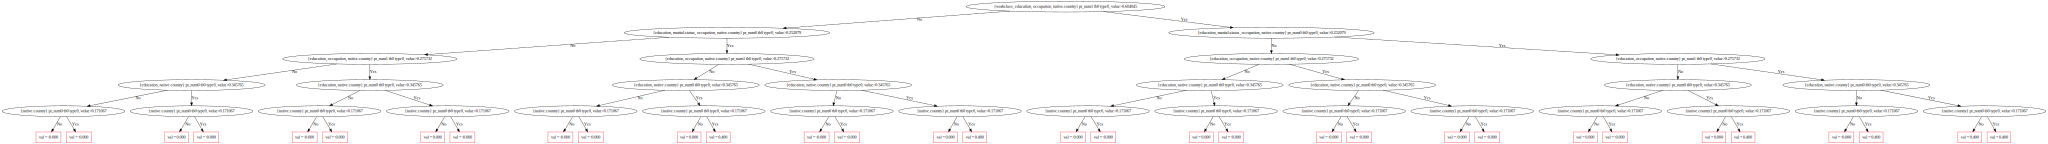

In [53]:
cb.plot_tree(
    tree_idx=0,
    pool=train_pool
)